In [1]:
# Import libraries
import pandas as pd

# Load the dataset
dataframe = "dataset/training_data.csv"
df = pd.read_csv(dataframe,
                 sep="\t",
                 header=None,
                 names=["Label", "Headline"]
                 )
# Create one backup from the original dataset
df_backup = df.copy()


Note: Column names are assigned at read-time.

No preprocessing or modification of raw data is performed here.


In [2]:
# Check for structure
#print(f"Dataset shape: {df.shape}")
print(f"We have {df.shape[0]} rows and {df.shape[1]} column(s)")
display(df.head())


We have 34152 rows and 2 column(s)


,Label,Headline
0,0,donald trump sends out embarrassing new year‚s...
1,0,drunk bragging trump staffer started russian c...
2,0,sheriff david clarke becomes an internet joke ...
3,0,trump is so obsessed he even has obama‚s name ...
4,0,pope francis just called out donald trump duri...


In [3]:
# Check null values
print("Null values")
display(df.isnull().sum())

Null values


,0
Label,0
Headline,0


We can state that no null values are present in the dataset.


In [4]:
# Check duplicated values
print("Duplicated values")
display(df.duplicated().sum())

# Drop duplicated values
df = df.drop_duplicates().reset_index(drop=True)
print(f"Shape after duplicates removed: {df.shape}")

Duplicated values


np.int64(1946)

Shape after duplicates removed: (32206, 2)


Repeated headlines were found in the dataset.  
These duplicates were removed to reduce redundancy and avoid potential bias during model training.

# Preprocessing part

1.   Lowercasing
2.   Tokenization
3.   Removing stop words
4.   Punctuation...

In [5]:
import nltk
from nltk.corpus import stopwords
import re
import string

nltk.download("stopwords")

stop_words = set(stopwords.words("english"))

def clean_text(text):
  text = text.lower()
  # Replaces tabs and breaklines
  text = re.sub(r"[\t\n]", " ", text)
  # Delete punctuaction and non-alphanumeric characters
  text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
  # Tokenize text
  tokens = text.split()
  # Delete stopwords
  tokens = [token for token in tokens if token not in stop_words]
  return " ".join(tokens)

# Apply preprocessing to the entire dataset
df["Cleaned_Headline"] = df["Headline"].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Creating text vectors (TF-IDF)

The cleaned text was transformed into numerical features using TF-IDF vectorization.
N-grams were used to capture contextual information between words.

In [6]:
# Import TF-IDF vectoreizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorize = TfidfVectorizer(

    ngram_range=(2,3), # Use bigrams and trigram for context capturation
    max_df= 0.9, # ignores terms that appear in more than 90% of the documents
    min_df = 5, # ignores terms that appear in fewer than 5 documents
    max_features = 5000 # limits the feature space to the 5000 most relevant terms
)

# Transform the cleaned headlines into TF-IDF feature vectors
X = vectorize.fit_transform(df["Cleaned_Headline"])
# Target variable (labels)
y = df["Label"]

In [7]:
# Uncomment this block if you want to see the tF-IDF vector
#feature_names = vectorize.get_feature_names_out()

#vectorize_array = X.toarray()

#for i, doc in enumerate(vectorize_array):
#    print(f"Document {i+1}")
#    for j, value in enumerate(doc):
#        if value > 0:
#          print(f" {feature_names[j]}: {round(value, 4)}")

# Split the training and testing sets

In [8]:
from sklearn.model_selection import train_test_split
# Split training (80%) and testing (20%) sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

# Different classifiers training

In [9]:
# Import libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

def model_evaluation(model_name, y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average='weighted')
  recall = recall_score(y_true, y_pred, average='weighted')
  f1 = f1_score(y_true, y_pred, average='weighted')

  # Confusion matrix
  cm = confusion_matrix(y_true, y_pred)

  # Plot confusion matrix
  plt.figure()
  sns.heatmap(cm, annot = True, fmt = "d", cmap="crest")
  plt.title(f"Confusion Matrix for {model_name} model")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()

  # Print evaluation results
  print(f"Evaluated model: {model_name}")
  print(f"Accuracy of the model: {round(accuracy,3)}")
  print(f"Precision of the model: {round(precision,3)}")
  print(f"Recall score of the model: {round(recall,3)}")
  print(f"F1-score of the model: {round(f1,3)}")
  print(f"=====================================")

  # Return metrics for later comparison
  return {
        "Model": model_name, "Accuracy": accuracy,
        "Precision": precision, "Recall": recall,
        "F1-score": f1}
# List to store evaluation results of all models
results = []

# Logistic regression

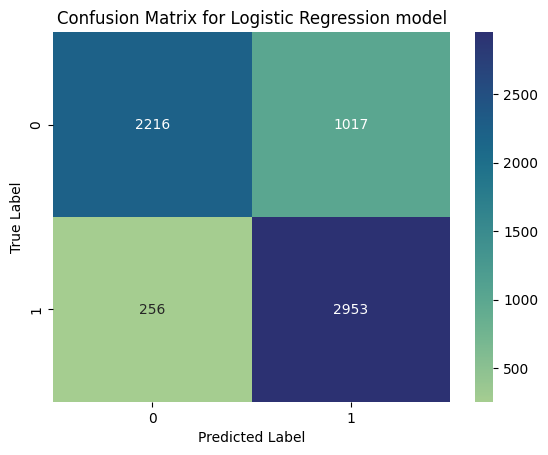

Evaluated model: Logistic Regression
Accuracy of the model: 0.802
Precision of the model: 0.82
Recall score of the model: 0.802
F1-score of the model: 0.8


In [21]:

# Import the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
# - max_iter=1000 ensures convergence for this dataset
lregression = LogisticRegression(max_iter = 1000)
lregression.fit(X_train, y_train)

# Predict on the validation set
y_pred_lreg = lregression.predict(X_val)

# Evaluate the model, the function will print metrics
# and plot the confusion matrix
results.append(model_evaluation("Logistic Regression",y_val, y_pred_lreg))

# Decision trees

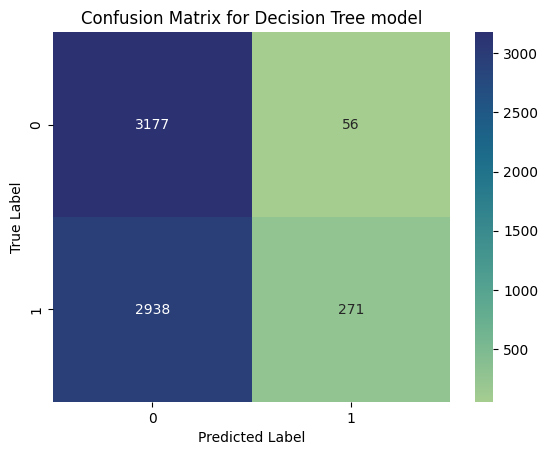

Evaluated model: Decision Tree
Accuracy of the model: 0.535
Precision of the model: 0.674
Recall score of the model: 0.535
F1-score of the model: 0.417


In [11]:

# Import the model
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
# - max_depth=5 limits the depth to avoid overfitting
tree = DecisionTreeClassifier(max_depth = 5)

# Fit the model on the training data
tree.fit(X_train, y_train)

# Predict on the validation set
y_pred_tree = tree.predict(X_val)

# Evaluate the model, the function will print metrics
# and plot the confusion matrix
results.append(model_evaluation("Decision Tree",y_val, y_pred_tree))

# Random forest

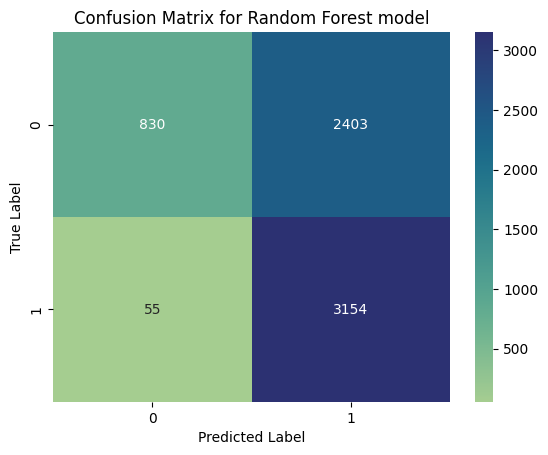

Evaluated model: Random Forest
Accuracy of the model: 0.618
Precision of the model: 0.753
Recall score of the model: 0.618
F1-score of the model: 0.561


In [12]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
# - n_estimators=100: number of trees in the forest
# - max_depth=5: limit depth of each tree to prevent overfitting
# - random_state=42: ensures reproducibility
forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Fit the model on the training data
forest.fit(X_train, y_train)

# Predict on the validation set
y_pred_forest = forest.predict(X_val)

# Evaluate the model, the function will print metrics
# and plot the confusion matrix
results.append(model_evaluation("Random Forest",y_val, y_pred_forest))

# Gradient Boosting

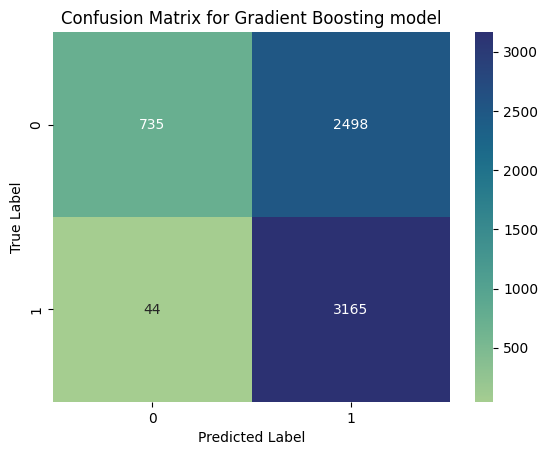

Evaluated model: Gradient Boosting
Accuracy of the model: 0.605
Precision of the model: 0.752
Recall score of the model: 0.605
F1-score of the model: 0.539


In [13]:
#Import the model
from sklearn.ensemble import GradientBoostingClassifier
# Initialize the Gradient Boosting classifier
# - n_estimators=100: number of boosting stages
# - learning_rate=1.0: step size shrinkage
# - max_depth=1: limit depth of each tree to avoid overfitting
# - random_state=42: ensures reproducibility
gb = GradientBoostingClassifier(n_estimators = 100, learning_rate = 1.0,
                                max_depth = 1, random_state = 42)

# Fit the model on the training data
gb.fit(X_train, y_train)

# Predict on the validation set
y_pred_gb = gb.predict(X_val)

# Evaluate the model, the function will print metrics
# and plot the confusion matrix
results.append(model_evaluation("Gradient Boosting",y_val, y_pred_gb))

# Support Vector Machine

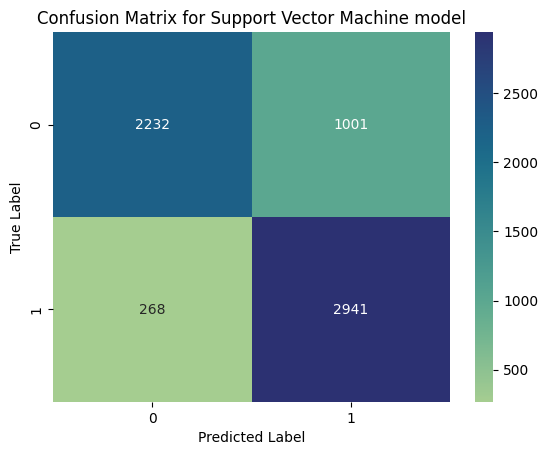

Evaluated model: Support Vector Machine
Accuracy of the model: 0.803
Precision of the model: 0.82
Recall score of the model: 0.803
F1-score of the model: 0.801


In [14]:
# Import the model
from sklearn.svm import SVC

# Initialize the SVM classifier
# - kernel='rbf': Radial Basis Function kernel for non-linear decision boundaries
# - C=1.0: regularization parameter
# - probability=True: allows probability estimates
svm_model = SVC(kernel = "rbf", C = 1.0, probability = True)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_svm = svm_model.predict(X_val)

# Evaluate the model, the function will print metrics
# and plot the confusion matrix
results.append(model_evaluation("Support Vector Machine",y_val, y_pred_svm))


# Note: SVM is typically slower to train than other models, especially on large datasets


# Hyperparameter tuning

In [15]:
# Import the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

# We test it with different C values
# - solver='liblinear' works well for small datasets
for C_val in [0.1, 1, 10]:
    lr = LogisticRegression(C=C_val, max_iter=1000, solver='liblinear')

    # Fit the model
    lr.fit(X_train, y_train)

    # Predict on validation set
    y_pred = lr.predict(X_val)

    # Print the metrics
    print(f"C = {C_val}")
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("F1-score:", f1_score(y_val, y_pred, average='weighted'))
    print("======================================")


C = 0.1
Accuracy: 0.7974231605091586
F1-score: 0.7943718611762471
C = 1
Accuracy: 0.8031667184104315
F1-score: 0.8004931124291789
C = 10
Accuracy: 0.8061161130083825
F1-score: 0.8035182258937851


In [16]:
# Import the model
from sklearn.svm import SVC

# We test it with different C values and two kernels
# C = regularization, kernel = type of boundary, probability = get class probabilities
for C_val in [0.1, 1]:
    for kernel in ['linear', 'rbf']:
        svm = SVC(C=C_val, kernel=kernel, probability=True)

        # Fit the model
        svm.fit(X_train, y_train)

        # Predict on validation set
        y_pred = svm.predict(X_val)

        # Print the metrics
        print(f"C = {C_val}, kernel = {kernel}")
        print("Accuracy:", accuracy_score(y_val, y_pred))
        print("F1-score:", f1_score(y_val, y_pred, average='weighted'))
        print("======================================")


C = 0.1, kernel = linear
Accuracy: 0.7978888543930457
F1-score: 0.794676889249684
C = 0.1, kernel = rbf
Accuracy: 0.7983545482769326
F1-score: 0.7946198233541997
C = 1, kernel = linear
Accuracy: 0.8028562558211736
F1-score: 0.800015847992364
C = 1, kernel = rbf
Accuracy: 0.8030114871158025
F1-score: 0.800514349989358


Model Comparison: Logistic Regression and SVM were tested. Logistic Regression slightly outperforms SVM in F1-score and accuracy. It is also faster to train, making it more practical for this dataset.

# Prediction on diferent dataset and format

In [17]:
import pandas as pd

# Load the dataset
testing_file = "dataset/testing_data.csv"
df_test = pd.read_csv(testing_file, sep="\t", header=None, names=["Label", "Headline"])

# We check the dataset structure
print(f"We have {df_test.shape[0]} rows and {df_test.shape[1]} column(s)")

display(df_test.head())


We have 9984 rows and 2 column(s)


,Label,Headline
0,2,copycat muslim terrorist arrested with assault...
1,2,wow! chicago protester caught on camera admits...
2,2,germany's fdp look to fill schaeuble's big shoes
3,2,mi school sends welcome back packet warning ki...
4,2,u.n. seeks 'massive' aid boost amid rohingya '...


In [18]:
# Preprocessing part
df_test["Cleaned_Headline"] = df_test["Headline"].apply(clean_text)

# Vectorize the text
X_test = vectorize.transform(df_test["Cleaned_Headline"])


In [19]:
 # Train the model
final_model = LogisticRegression(C=10, solver="liblinear", max_iter=1000)
final_model.fit(X, y)

# Use the model to predict
test_predictions = final_model.predict(X_test)

# Replace the original label with the predicted one
df_test["Label"] = test_predictions

# Save the output
df_test.to_csv(
    "dataset/testing_data_predictions.csv",
    sep="\t",
    header=False,
    index=False
)



In [20]:
# Display the first 10 rows of the test set with predictions
df_test.head(10)

# Count how many fake (0) and real (1) news were predicted
df_test["Label"].value_counts()

# Get class probabilities for each headline
probas = final_model.predict_proba(X_test)

# Convert probabilities to a DataFrame for easier visualization
probas_df = pd.DataFrame(probas, columns=["Prob_fake", "Prob_real"])

# Combine headlines, predicted labels, and probabilities into one DataFrame
results_df = pd.concat(
    [df_test[["Headline", "Label"]].reset_index(drop=True), probas_df],
    axis=1
)

# Display the first 10 rows of the final results
display(results_df.head(10))

df_test[["Headline", "Cleaned_Headline"]].head(10)

,Headline,Label,Prob_fake,Prob_real
0,copycat muslim terrorist arrested with assault...,0,0.944838,0.055162
1,wow! chicago protester caught on camera admits...,0,0.957613,0.042387
2,germany's fdp look to fill schaeuble's big shoes,1,0.490731,0.509269
3,mi school sends welcome back packet warning ki...,0,0.912701,0.087299
4,u.n. seeks 'massive' aid boost amid rohingya '...,1,0.490731,0.509269
5,did oprah just leave ‚nasty‚ hillary wishing s...,1,0.490731,0.509269
6,france's macron says his job not 'cool' cites ...,1,0.004813,0.995187
7,flashback: chilling ‚60 minutes‚ interview wit...,0,0.942331,0.057669
8,spanish foreign ministry says to expel north k...,1,0.023491,0.976509
9,trump says cuba 'did some bad things' aimed at...,1,0.012611,0.987389


,Headline,Cleaned_Headline
0,copycat muslim terrorist arrested with assault...,copycat muslim terrorist arrested assault weapons
1,wow! chicago protester caught on camera admits...,wow chicago protester caught camera admits vio...
2,germany's fdp look to fill schaeuble's big shoes,germanys fdp look fill schaeubles big shoes
3,mi school sends welcome back packet warning ki...,mi school sends welcome back packet warning ki...
4,u.n. seeks 'massive' aid boost amid rohingya '...,un seeks massive aid boost amid rohingya emerg...
5,did oprah just leave ‚nasty‚ hillary wishing s...,oprah leave nasty hillary wishing wouldnt endo...
6,france's macron says his job not 'cool' cites ...,frances macron says job cool cites talks turke...
7,flashback: chilling ‚60 minutes‚ interview wit...,flashback chilling 60 minutes interview george...
8,spanish foreign ministry says to expel north k...,spanish foreign ministry says expel north kore...
9,trump says cuba 'did some bad things' aimed at...,trump says cuba bad things aimed us diplomats



Resources for this project:

https://dhruv-panchal.medium.com/mastering-classification-with-scikit-learn-an-in-depth-guide-f37ad7bbba06

https://www.geeksforgeeks.org/machine-learning/comprehensive-guide-to-classification-models-in-scikit-learn/